In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
try:
    df_prefix = pd.read_csv('testing_results.csv', sep=';')
    df_soft = pd.read_csv('soft_testing_results.csv', sep=';')
    print("Dati di training e testing caricati con successo!")
except FileNotFoundError:
    print("Errore.")
    raise

Dati di training e testing caricati con successo!


In [4]:
print("\nDataFrame di prefix:")
print(df_prefix.head())
print("\nDataFrame di soft:")
print(df_soft.head())


DataFrame di prefix:
               Model                Dataset  Token_Length  Learning_Rate  \
0  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00100   
1  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00010   
2  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00001   
3  bert-base-uncased  disi-unibo-nlp/AnatEM            20        0.00100   
4  bert-base-uncased  disi-unibo-nlp/AnatEM            20        0.00010   

   Micro Avg F1-Score  
0              0.8274  
1              0.8097  
2              0.8122  
3              0.8235  
4              0.8107  

DataFrame di soft:
               Model                Dataset  Token_Length  Learning_Rate  \
0  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00100   
1  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00010   
2  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00001   
3  bert-base-uncased  disi-unibo-nlp/AnatEM          

In [18]:
df_prefix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               54 non-null     object 
 1   Dataset             54 non-null     object 
 2   Token_Length        54 non-null     int64  
 3   Learning_Rate       54 non-null     float64
 4   Micro Avg F1-Score  54 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [ ]:
# !!! dato un param usa il primo del secondo param, da modificare
def plot_f1_score_comparison(
    df: pd.DataFrame, 
    param_col_name: str, 
    f1_score_col: str = 'Micro Avg F1-Score',
    title: str = "title template"
):

    df_plotting = df.copy()

    # Rinomina la colonna del parametro per facilità nel plotting
    # Il nome temporaneo sarà 'Trained_Param_Value'
    TEMP_PARAM_COL = 'Trained_Param_Value'
    df_plotting = df_plotting.rename(columns={param_col_name: TEMP_PARAM_COL})

    # Sort per garantire l'ordine dei dataset e delle configurazioni
    df_plotting = df_plotting.sort_values(by=['Dataset', 'Model', TEMP_PARAM_COL])

    plt.figure(figsize=(16, 10))

    # Dati
    datasets = df_plotting['Dataset'].unique()
    configurations = df_plotting[['Model', TEMP_PARAM_COL]].drop_duplicates().reset_index(drop=True)
    num_configs = len(configurations)
    
    # Calcolo della larghezza e delle posizioni
    bar_width = 0.8 / num_configs
    x_pos = np.arange(len(datasets))

    # Scelta della colormap
    colors = plt.cm.get_cmap('Paired', num_configs)

    # Barre
    for i, (index, config) in enumerate(configurations.iterrows()):
        model = config['Model']
        param_val = config[TEMP_PARAM_COL]

        # Subset del DataFrame per la configurazione corrente (Modello + Valore Parametro)
        subset = df_plotting[
            (df_plotting['Model'] == model) & 
            (df_plotting[TEMP_PARAM_COL] == param_val)
        ]
        
        # Estrai gli F1-Score per l'ordinamento dei dataset
        heights = [subset[subset['Dataset'] == ds][f1_score_col].iloc[0] for ds in datasets]

        # Calcola la posizione centrale per la barra del gruppo corrente
        position = x_pos + (i - (num_configs - 1) / 2) * bar_width

        # Etichetta per la legenda
        legend_label = f'{model} ({param_col_name.replace("_", " ").title()}: {param_val})'

        # Disegna le barre
        plt.bar(
            position, 
            heights, 
            bar_width, 
            label=legend_label, 
            color=colors(i)
        )
        
        # Etichette sopra le barre (valore esatto)
        for pos, height in zip(position, heights):
            plt.text(
                pos, 
                height + 0.01, 
                f'{height:.4f}', 
                ha='center', 
                va='bottom', 
                fontsize=9
            )

    
    plt.title(title, fontsize=16)

    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel(f1_score_col.replace("_", " ").title(), fontsize=12)
    plt.xticks(x_pos, datasets)
    plt.ylim(0, 1.05)
    plt.legend(title='Configurazione Modello/Parametro')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\Franco\AppData\Local\Temp\ipykernel_18324\3840711057.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


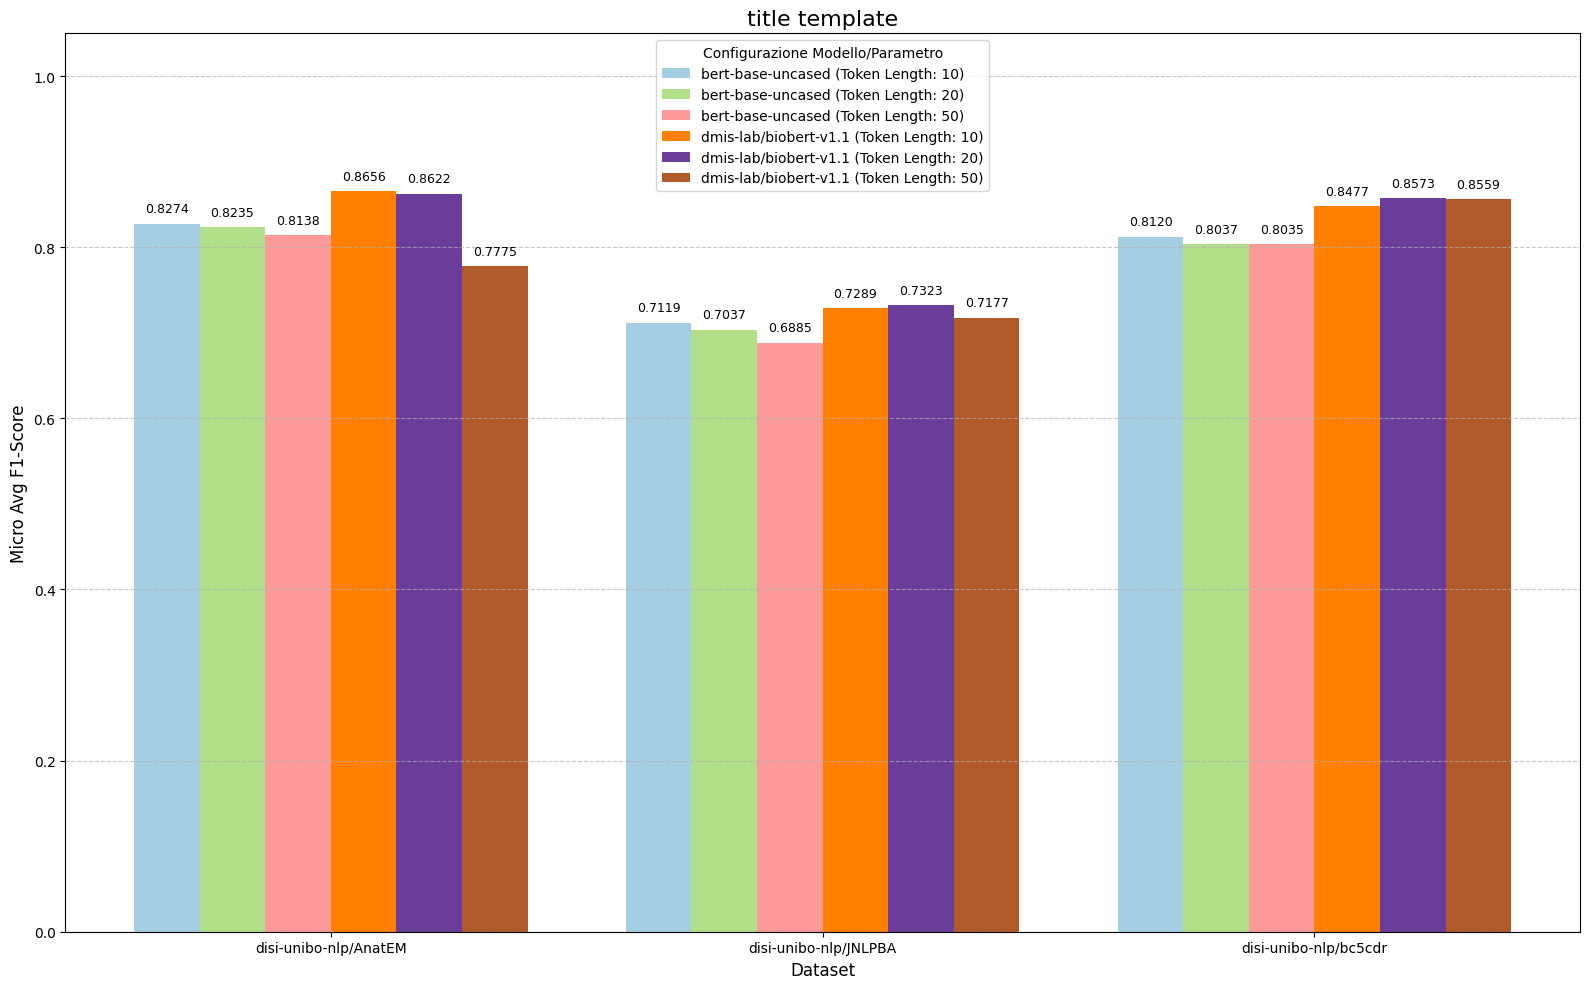

In [24]:
plot_f1_score_comparison(df=df_prefix, param_col_name="Token_Length")

C:\Users\Franco\AppData\Local\Temp\ipykernel_18324\3840711057.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


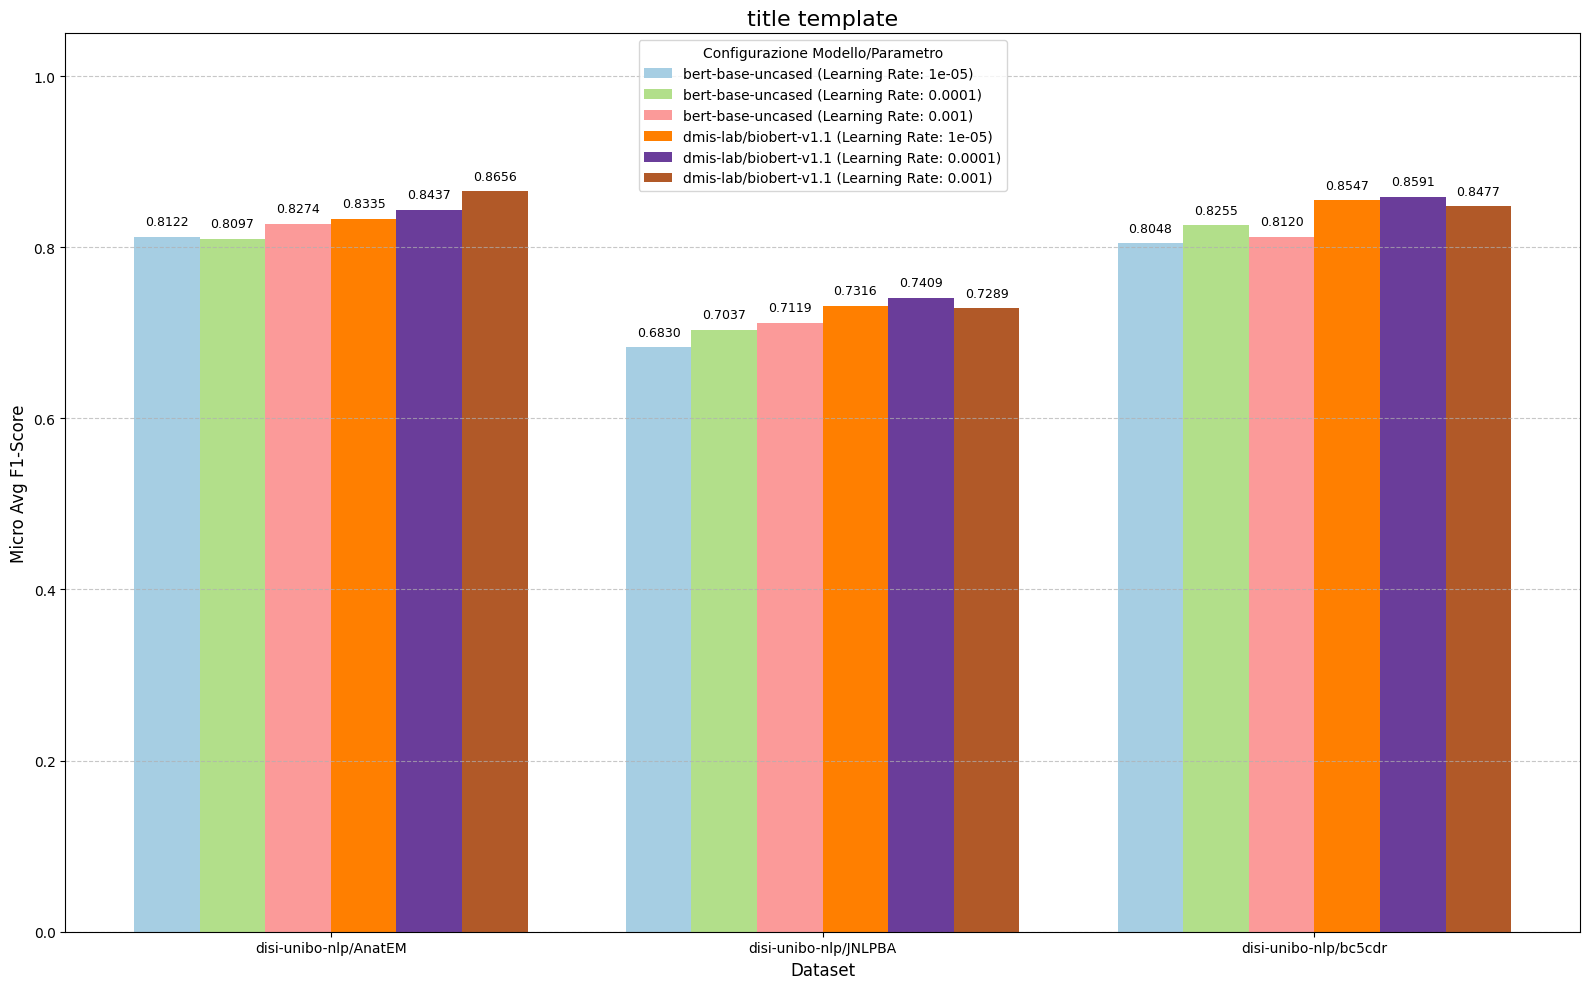

In [25]:
plot_f1_score_comparison(df=df_prefix, param_col_name="Learning_Rate")

## ClinicalBert ha usato la metà del tempo per ogni epoca per addestrarsi rispetto agli altri modelli

C:\Users\Franco\AppData\Local\Temp\ipykernel_18324\3840711057.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


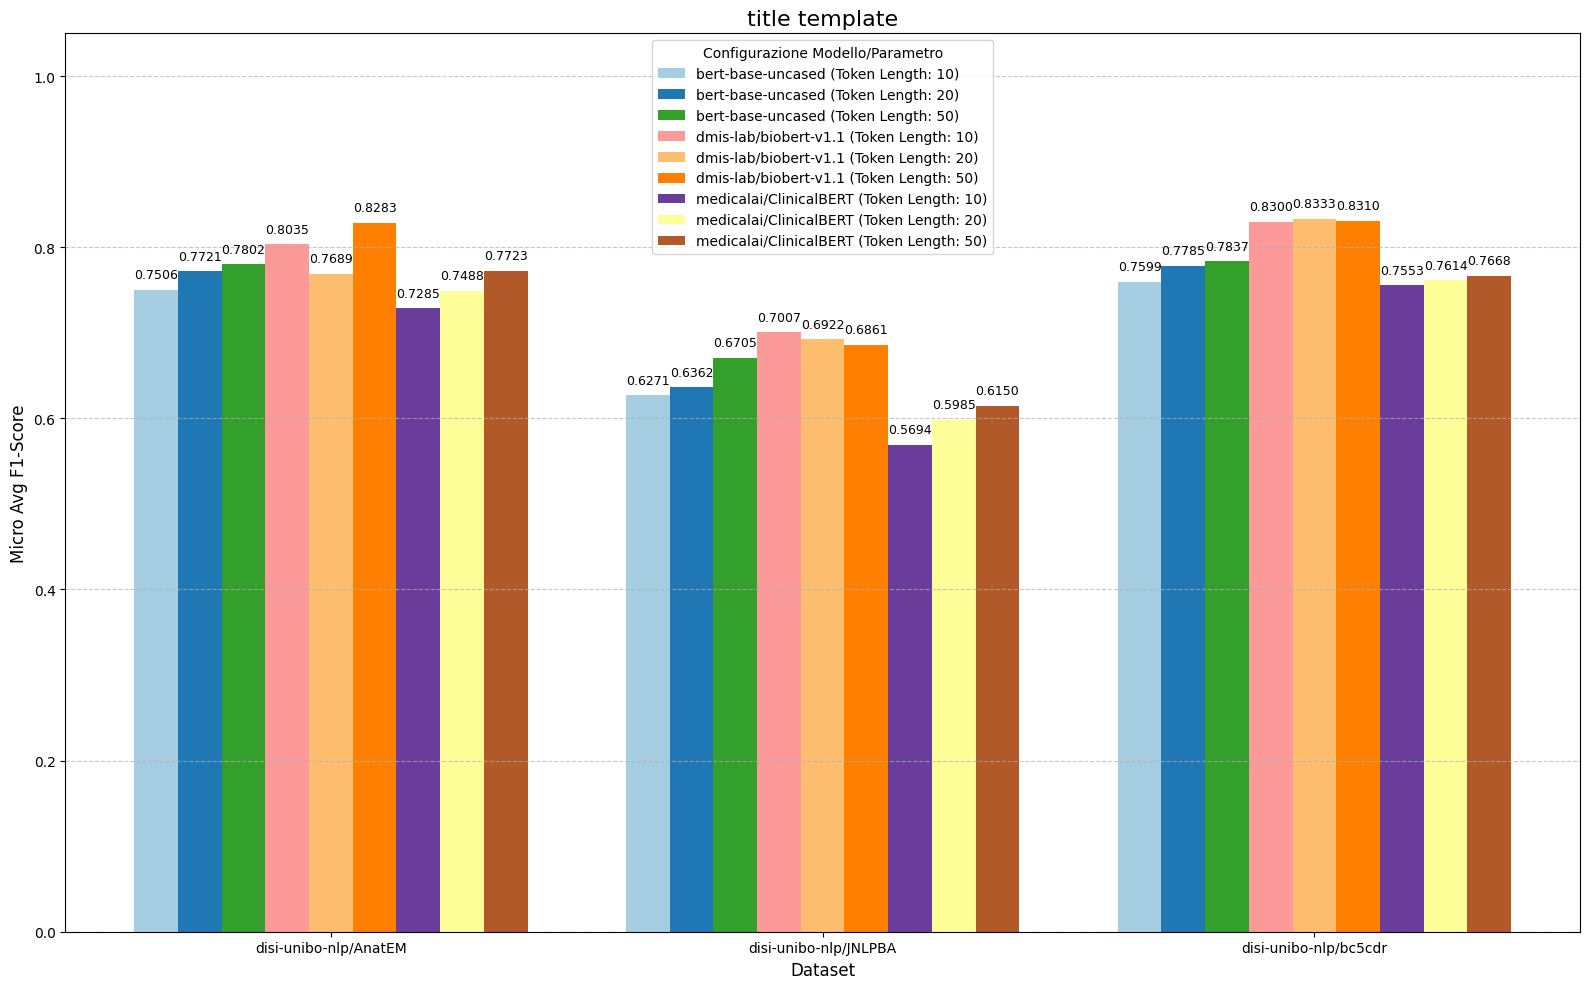

In [26]:
plot_f1_score_comparison(df=df_soft, param_col_name="Token_Length")

C:\Users\Franco\AppData\Local\Temp\ipykernel_18324\3840711057.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


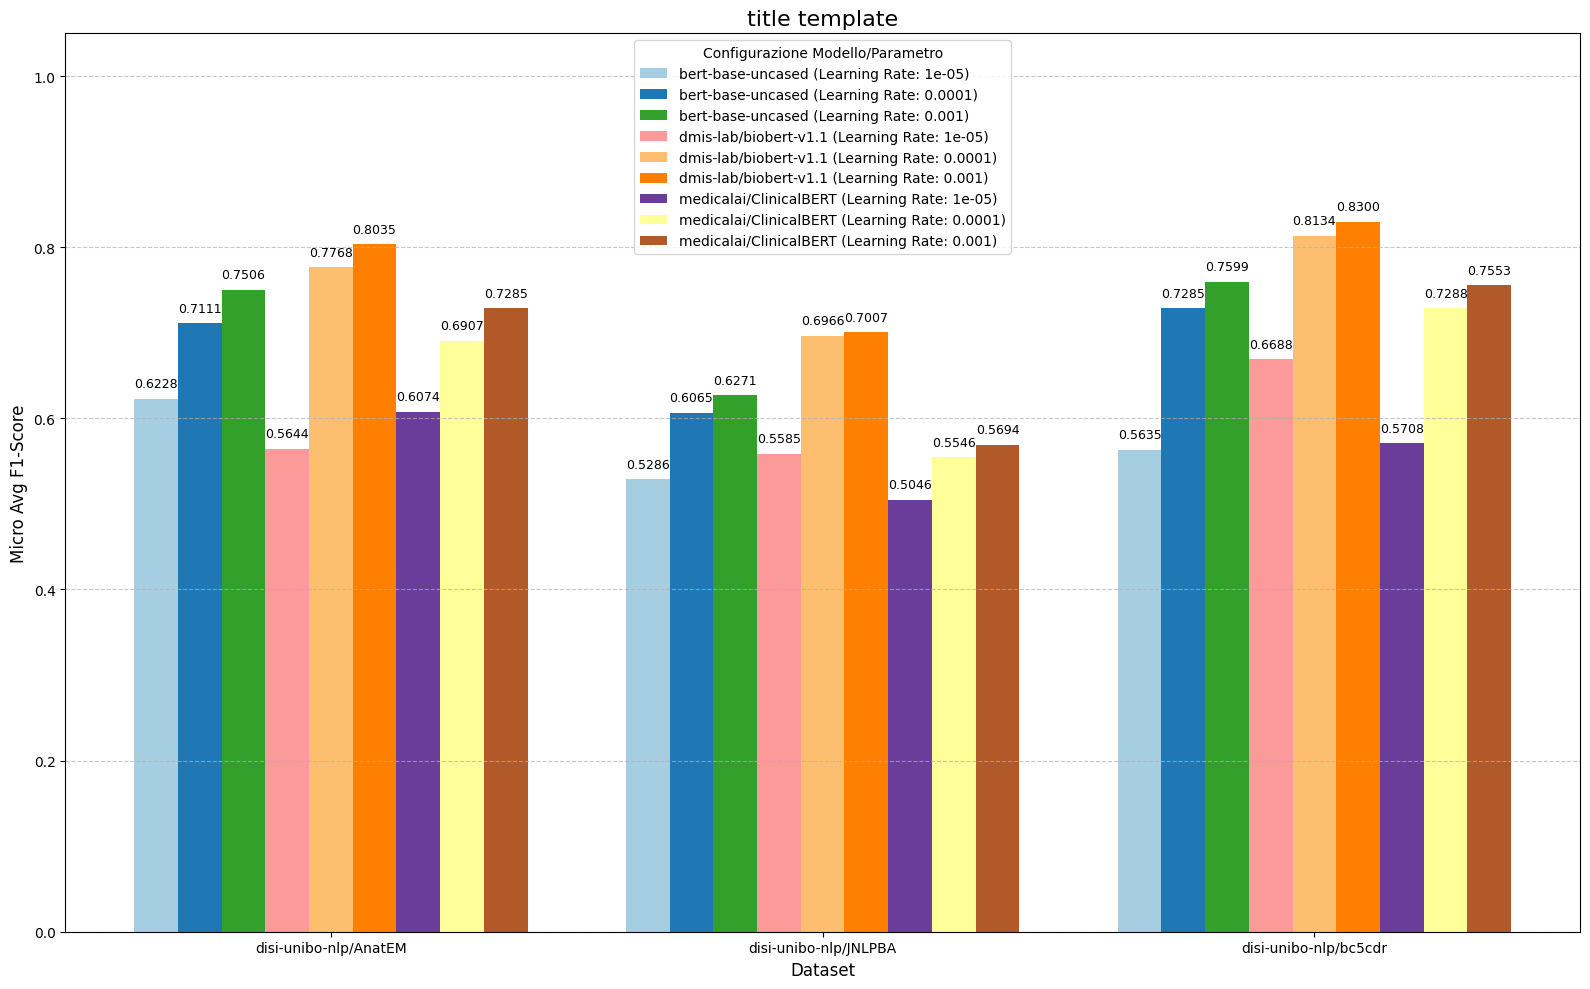

In [27]:
plot_f1_score_comparison(df=df_soft, param_col_name="Learning_Rate")